In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Univariate Analysis on Numerical Column

## Age

***Conclusions***

 - Age is almost normally distributed
 - Around 20% of the values are missing
 - There are some outliers present 

In [4]:
#Summary statistic
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

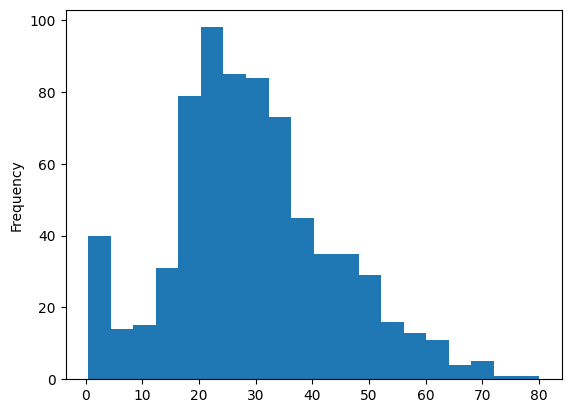

In [5]:
#Histogram
df['Age'].plot(kind = "hist", bins = 20)

*Most passengers are of the age group 20-40*

<Axes: ylabel='Density'>

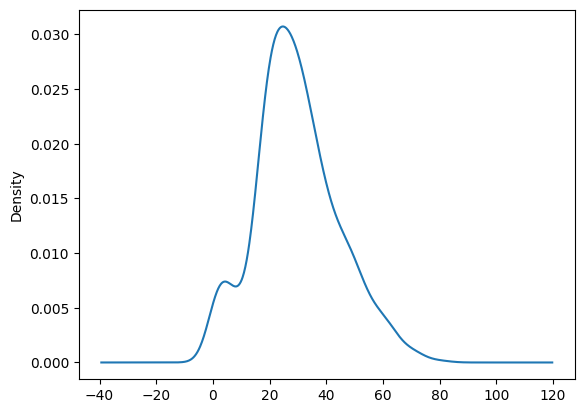

In [6]:
#The distribution of the data
df['Age'].plot(kind = "kde")

In [7]:
#Skewness
df['Age'].skew()

0.38910778230082704

*as skewness is closer to 0, we can say that the data is almost normally distributed*

<Axes: >

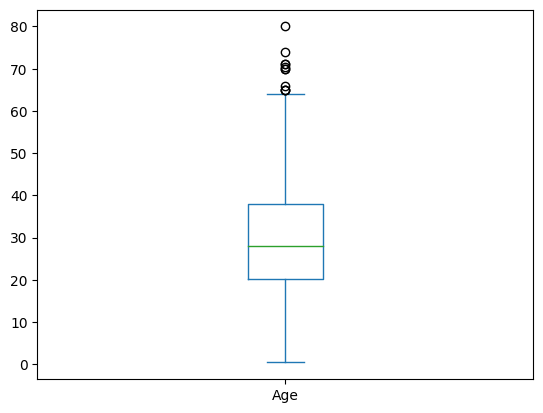

In [8]:
#Boxp;ot
df['Age'].plot(kind = "box")

*Outliers are present above 65*

In [9]:
#are the outliers part of the data?
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [10]:
#Missing values

df['Age'].isnull().sum()

177

In [11]:
#Proportion of missing values

df['Age'].isnull().sum()/len(df['Age'])

0.19865319865319866

## Fare

***Conclusions***

- Fare column is positvely skewed
- Fare column contains grouped fare and not individual fare. 
- We need to create a new columns 


In [12]:
#Summary statistic

df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

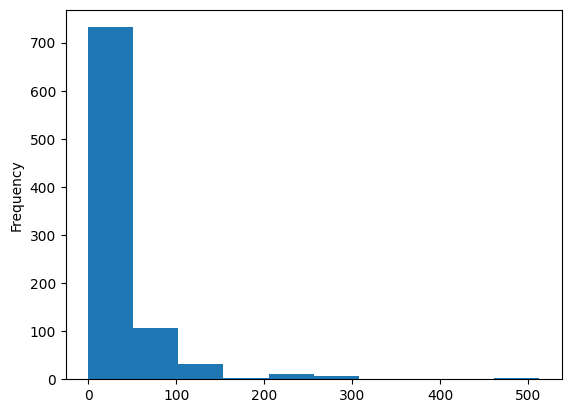

In [13]:
# Histogram

df["Fare"].plot(kind = "hist")

<Axes: ylabel='Density'>

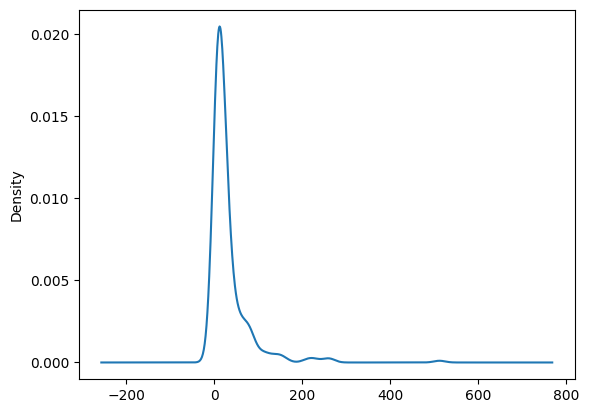

In [14]:
#Distribution of the data

df['Fare'].plot(kind = "kde")

In [15]:
#Skewness of the data

df['Fare'].skew()

4.787316519674893

*The data is highly positively skewed*

<Axes: >

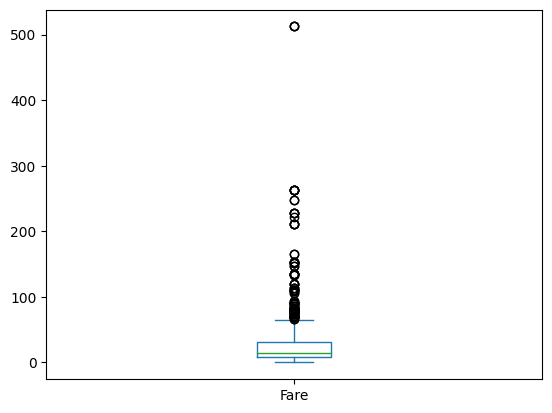

In [16]:
#Detecting outliers using boxplot

df['Fare'].plot(kind = 'box')

In [17]:
#Are outliers a part of the data?

df[df['Fare']> 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


*Three passengers have fare greater than 300, but their ticket is the same. This means that in the fare column, the whole family's accumulated fare is given, i.e. individual fare of the passengers are not given*

In [18]:
#Missing values

df['Fare'].isnull().sum()

0

# Univariate Analysis on Cateogircal Column

### Survived

***Conclusions***

- Out of 891 passengers, 549 passengers died and 342 survived
- The accident can be termed as "severe" as more than half of the passengers died 

In [19]:
df['Survived'].shape

(891,)

In [20]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

*Only 342 survived*

<Axes: xlabel='Survived'>

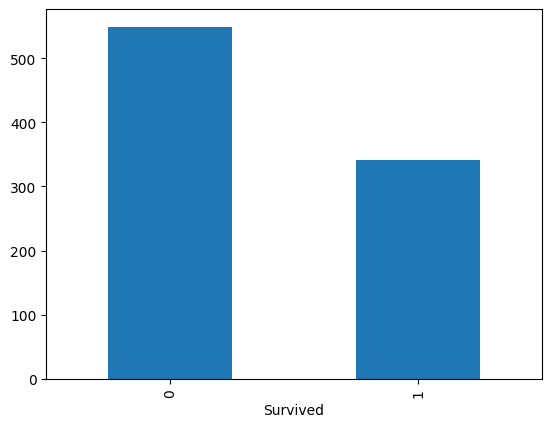

In [21]:
#Visualizing the people who survived or died'
df['Survived'].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

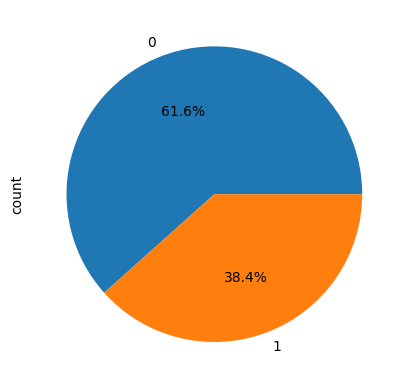

In [22]:
#Percentage of people who survived and died
df['Survived'].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

*more than 50% of the passengers dies hence we can conclude that it was a deadly accident*

In [23]:
df['Survived'].isnull().sum()

0

### PClass - Passnger class

***Conclusions***

- 491 passengers are travelling in the first class which is the maximum.
- Interestingly, 1st class has the second second highest number of passengers as opposed to the 2nd class which has the least number of passengers travelling

In [24]:
df['Pclass'].shape

(891,)

In [25]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

*Maximum passengers are from the third class*

<Axes: xlabel='Pclass'>

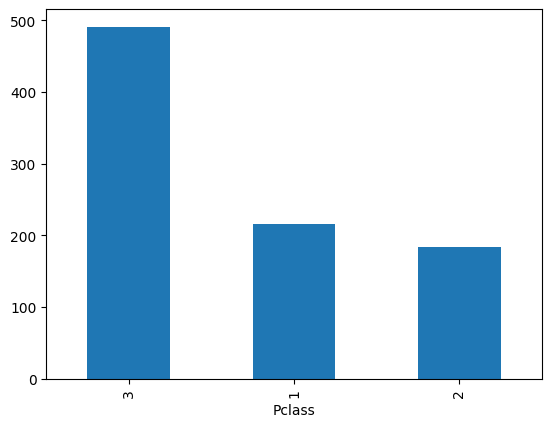

In [26]:
#visualizing the number of passengers from each class

df['Pclass'].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

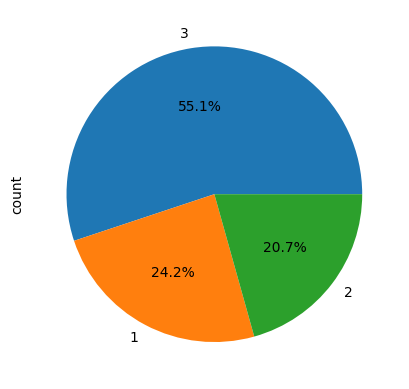

In [27]:
df['Pclass'].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

### Sex

***Conclusions***

- Male passengers are more than the female passengers

In [28]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

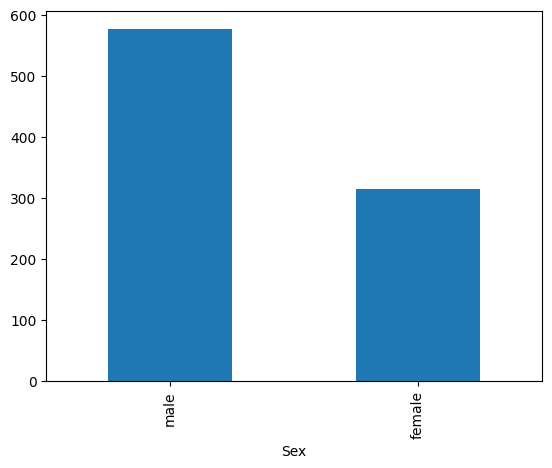

In [29]:
df['Sex'].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

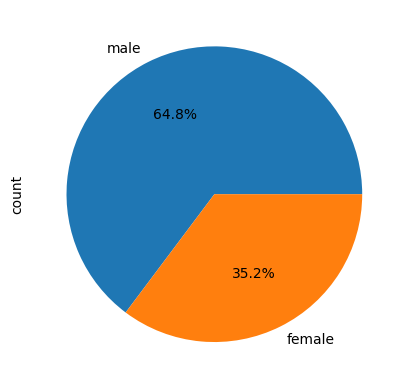

In [30]:
df['Sex'].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

### SibSP - siblings and spouse

***Conclusions***

- most passengers are travelling alone

In [31]:
df["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

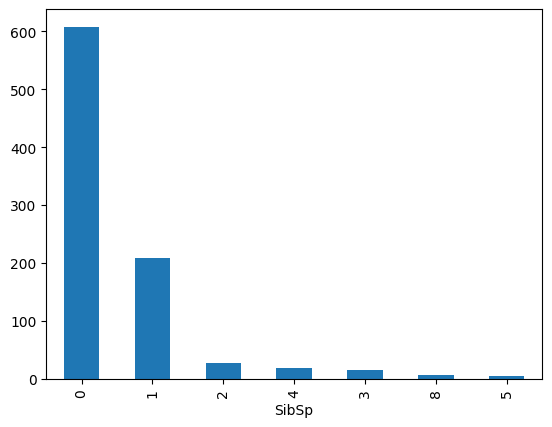

In [32]:
df["SibSp"].value_counts().plot(kind = "bar")

In [33]:
df["SibSp"].isnull().sum()

0

### Parch - Parents and children

***Conclusions***

- most passengers are travelling alone
- Parch and SibSp can be merged together to form a new columns called "family_size"
- We can also create a new column for people who are travelling alone to get more insights

In [34]:
df["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

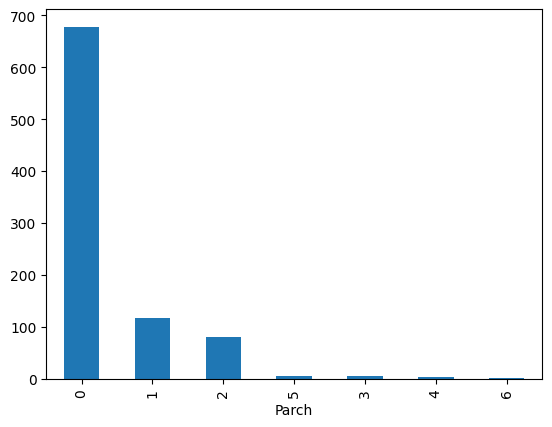

In [35]:
df["Parch"].value_counts().plot(kind = "bar")

In [36]:
df["Parch"].isnull().sum()

0

### Embarked

* S - South Hampton (the beginning of the voyage)
* C - Cherbourg
* Q - Queenstown (last stop before the accident)

***Conclusions***

- most passengers are travelling alone
- Parch and SibSp can be merged together to form a new columns called "family_size"
- We can also create a new column for people who are travelling alone to get more insights

In [37]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

*Most passengers aboarded the ship at the first stop*

<Axes: xlabel='Embarked'>

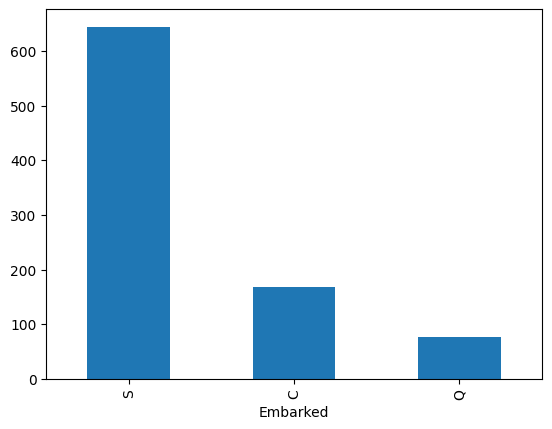

In [38]:
df['Embarked'].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

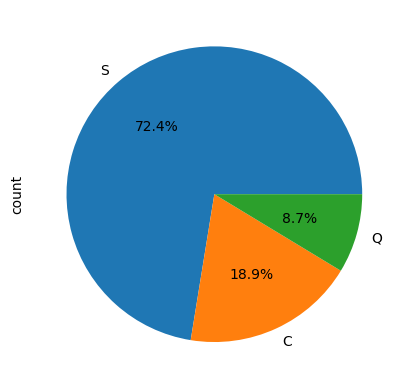

In [39]:
df['Embarked'].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

# Bivariate Analysis 

### Survived vs Pclass (cat vs cat)

***Conclusions***

- Safest class was the first class 
- The most dangerous class was the third class

In [40]:
#Contingency table

pd.crosstab(df["Survived"], df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


*Most people who died belonged to the third class*

In [41]:
#Contingency table in percentage

pd.crosstab(df["Survived"], df['Pclass'], normalize = "columns")*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

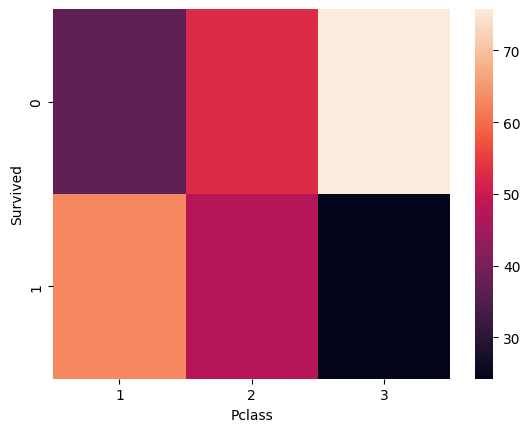

In [42]:
#Visualizing the contingency table

sns.heatmap(pd.crosstab(df["Survived"], df['Pclass'], normalize = "columns")*100)

### Survived vs Sex (cat vs cat)

***Conclusions***

- Females were given more priority than males as only 25% of the female passengers died as compared to the males (81%)

In [43]:
pd.crosstab(df["Survived"], df['Sex'], normalize = "columns")*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


*81% of the male passengers died*

<Axes: xlabel='Sex', ylabel='Survived'>

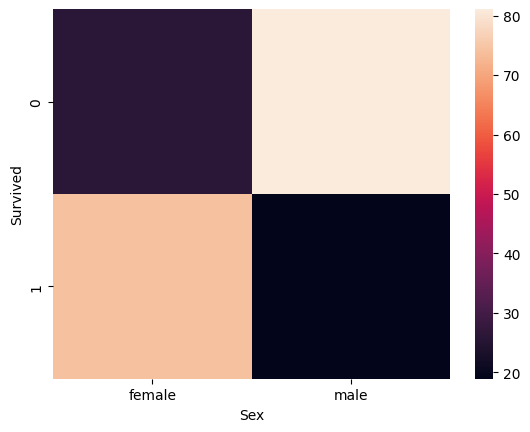

In [44]:
sns.heatmap(pd.crosstab(df["Survived"], df['Sex'], normalize = "columns")*100)

### Survived vs Embarked (cat vs cat)

***Conclusions***

- Weirdly, the port from which the passengers aboarded the ship has some relation to their death

- Most of the passengers who survived, aboarded the ship at C, this is because most of them are from the first class (derivative conclusion)

In [45]:
pd.crosstab(df["Survived"], df['Embarked'], normalize = "columns")*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


*Most of the passengers who died embarked from South Hampton*

<Axes: xlabel='Embarked', ylabel='Survived'>

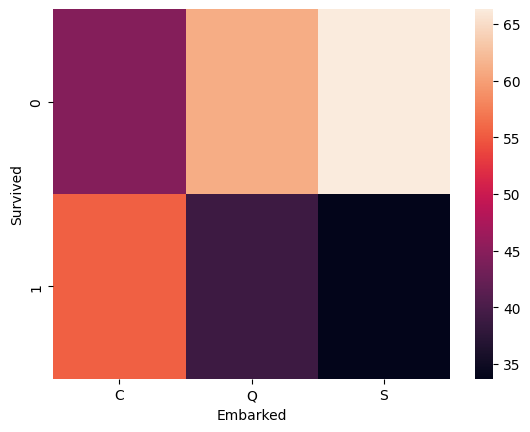

In [46]:
sns.heatmap(pd.crosstab(df["Survived"], df['Embarked'], normalize = "columns")*100)

In [47]:
pd.crosstab(df["Sex"], df['Embarked'], normalize = "columns")*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


*Our assumption that most of the passengers from C are females is rejected here*

In [48]:
pd.crosstab(df["Pclass"], df['Embarked'], normalize = "columns")*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


*Clearly most of the passengers who aboarded the ship from C belong to the first class and hence are more likely to survive*

### Survived vs Age (cat vs numerical)

***Conclusions***

- Age is a very important variable 
- Children are more likely to survive whereas older people are more likely to die

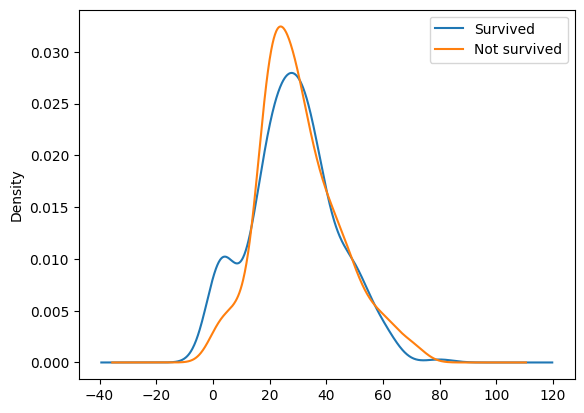

In [49]:
df[df['Survived'] == 1]["Age"].plot(kind = 'kde', label = "Survived")   #passengers who survived

df[df['Survived'] == 0]["Age"].plot(kind = 'kde', label = "Not survived")    #passengers who survived

plt.legend()
plt.show()

*Passengers of the age group 0-5 (children) are more likely to survive than die (blue curve is dominating)*

*Passengers of the age group 60-80 (elders) are more likely to die than survive*

# Feature Engineering

### Fare
- Ideally, we should have individual fare

In [50]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

*We can take the family which is travelling with the most amount of people*

In [51]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


*These individuals belong to the same family because their ticket no., Last name is the same*

*There should be 11 members (8+2) but we have only 7 members. The rest of them should be in the test dataset or are missing*

In [52]:
df1 = pd.read_csv("/kaggle/input/titanic/test.csv")

In [53]:
df1[df1['Ticket'] == "CA. 2343"]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S


In [54]:
#combining test and train data

df = pd.concat([df,df1])

In [55]:
df[df['Ticket'] == "CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [56]:
#Creating a new column "individual fare" by dividing the fare with the number of members

df['Individual_fare'] = df['Fare']/(df['SibSp']+df['Parch']+1)

<Axes: >

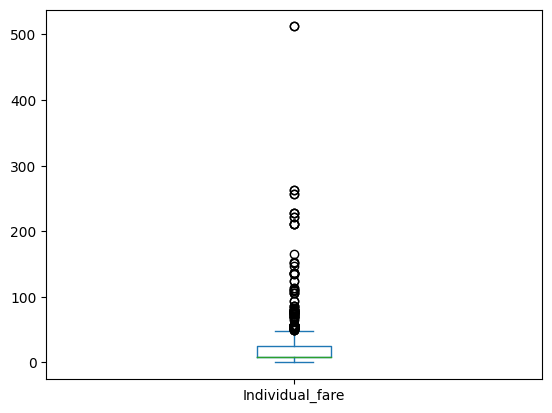

In [57]:
df['Individual_fare'].plot(kind = "box")

In [58]:
df[['Individual_fare', 'Fare']].describe()

,Individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


*A passenger has actually paid 512 dollars*

### Sibsp and Parch
- we can combine the two variables to get the family size
- Family type:
* 1 : Alone
* 2-4 : Small family
* more than 5 : large family

In [59]:
df['Family_size'] = df["SibSp"]+df['Parch']+1

In [60]:
#creating a new variable "family type"

def transform_family_size (num):
    if num == 1 : 
        return "alone"
    elif num>2 and num < 5:
        return "small"
    else:
        return "large"

In [61]:
#calling the function

df["family_type"] = df['Family_size'].apply(transform_family_size)

In [62]:
#Contingency table

pd.crosstab(df['Survived'], df['family_type'], normalize = "columns")*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,55.605381,38.931298
1.0,30.353818,44.394619,61.068702


*If the passenger is travelling alone, then he/she has the highest chance of dying*

*In case of a small family, there is 61% chance of survivng*

### Name

In [63]:
#extracting the last name

df['surname'] = df['Name'].str.split(",").str.get(0)

In [64]:
#title 

df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [65]:
#extracting the title
df['title'].value_counts()

title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [66]:
#Cleaning "Title"
# We can combine the extra title and replace it with "other"
df['title'] = df['title'].str.replace('Rev.','other')
df['title'] = df['title'].str.replace('Dr.','other')
df['title'] = df['title'].str.replace('Col.','other')
df['title'] = df['title'].str.replace('Major.','other')
df['title'] = df['title'].str.replace('Capt.','other')
df['title'] = df['title'].str.replace('Jonkheer.','other')

In [67]:
df.title.value_counts()

title
Mr.        757
Miss.      260
Mrs.       197
Master.     61
other       24
Ms.          2
Mlle.        2
Don.         1
Mme.         1
Lady.        1
Sir.         1
the          1
Dona.        1
Name: count, dtype: int64

In [68]:
#does title affect the survival rate?

temp_df = df[df['title'].isin(['Mr.','Miss.','Mrs.','Master.','ootherr'])]

In [69]:
pd.crosstab(temp_df['Survived'],temp_df['title'],normalize='columns')*100

title,Master.,Miss.,Mr.,Mrs.
Survived,,,,
0.0,42.5,30.21978,84.332689,20.8
1.0,57.5,69.78022,15.667311,79.2


"Mr" has the highest chance of dying

"Miss" has the highest chance of surviving

### Cabin

*We can analyze the cabin by extracting the initial letter because that signifies the deck on which the passenger stays in. The deck can help us understand which passenger has higher chance of survival*


- A deck : First class lounge
- B deck : dining facilities to first class passengers
- C deck : Third class rooms
- D deck : public room for first and second class (dining, saloon etc)
- E deck : third class and seamen, cooks etc
- F deck : second and third class
- G deck : squash court. letters and parcels were stored here

In [70]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [71]:
#Replacing the missing values with M

df['Cabin'] = df['Cabin'].fillna("M")

In [72]:
df['Cabin'].value_counts()

Cabin
M                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [73]:
#creating a new variable to extract deck info

df['Deck'] = df['Cabin'].str[0]

In [74]:
df['Deck'].value_counts()

Deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [75]:
pd.crosstab(df['Deck'], df['Pclass'])

Pclass,1,2,3
Deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='Deck'>

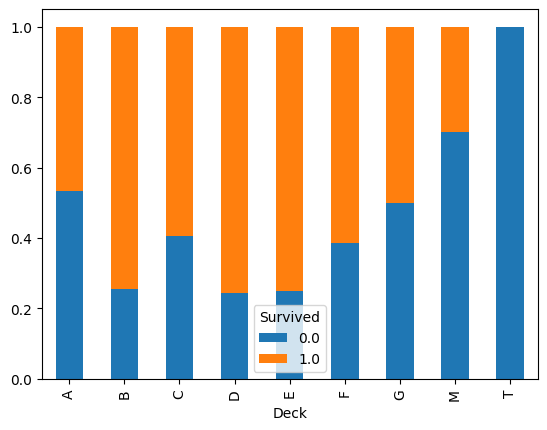

In [76]:
pd.crosstab(df['Deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)